### Simple Image Processing Techniques on Convection Cell Images

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
from early_analysis import *

In [3]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/initial_convection_images"
os.chdir(source_dir)

Importing image:

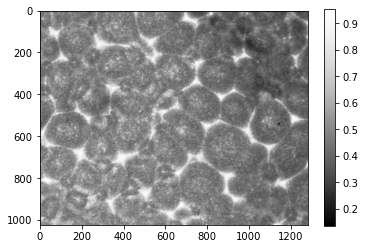

In [4]:
image = mpimg.imread('frame1.png')
image = image[...,0]
height, width = np.shape(image)
plt.imshow(image, cmap='Greys_r')
plt.colorbar();

In [5]:
np.shape(image)

(1024, 1280)

##### Looking at Intensity Distribution

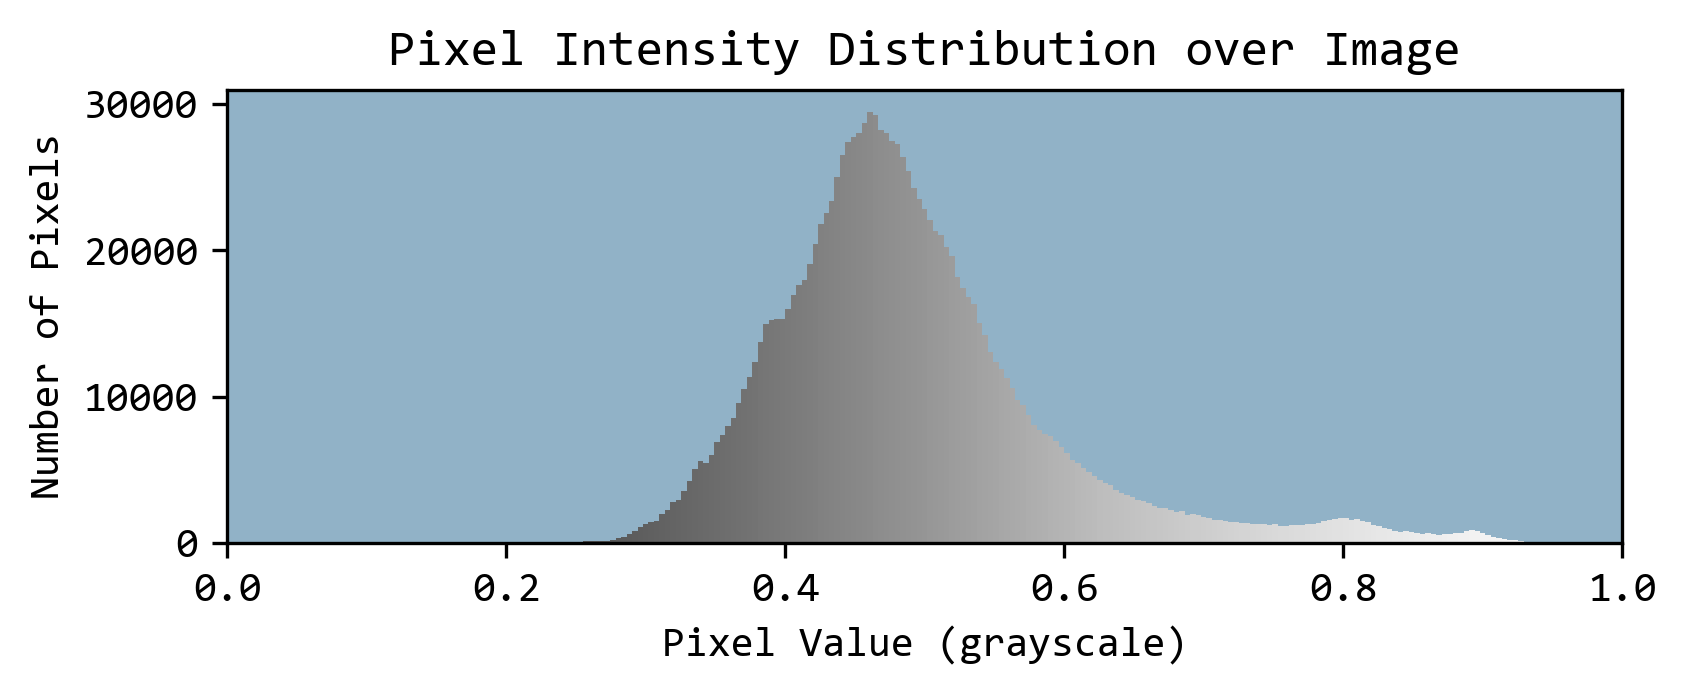

In [6]:
plotintensitydistribution(image)

##### Nearest Neighbor Difference Mapping

In [7]:
neighbor_difference_image = nearestneighborimage(image)
neighbor_difference_image = neighbor_difference_image/np.max(neighbor_difference_image)

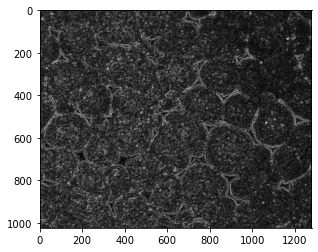

In [8]:
plt.imshow(neighbor_difference_image, cmap='Greys_r');

What is this image's distribution?

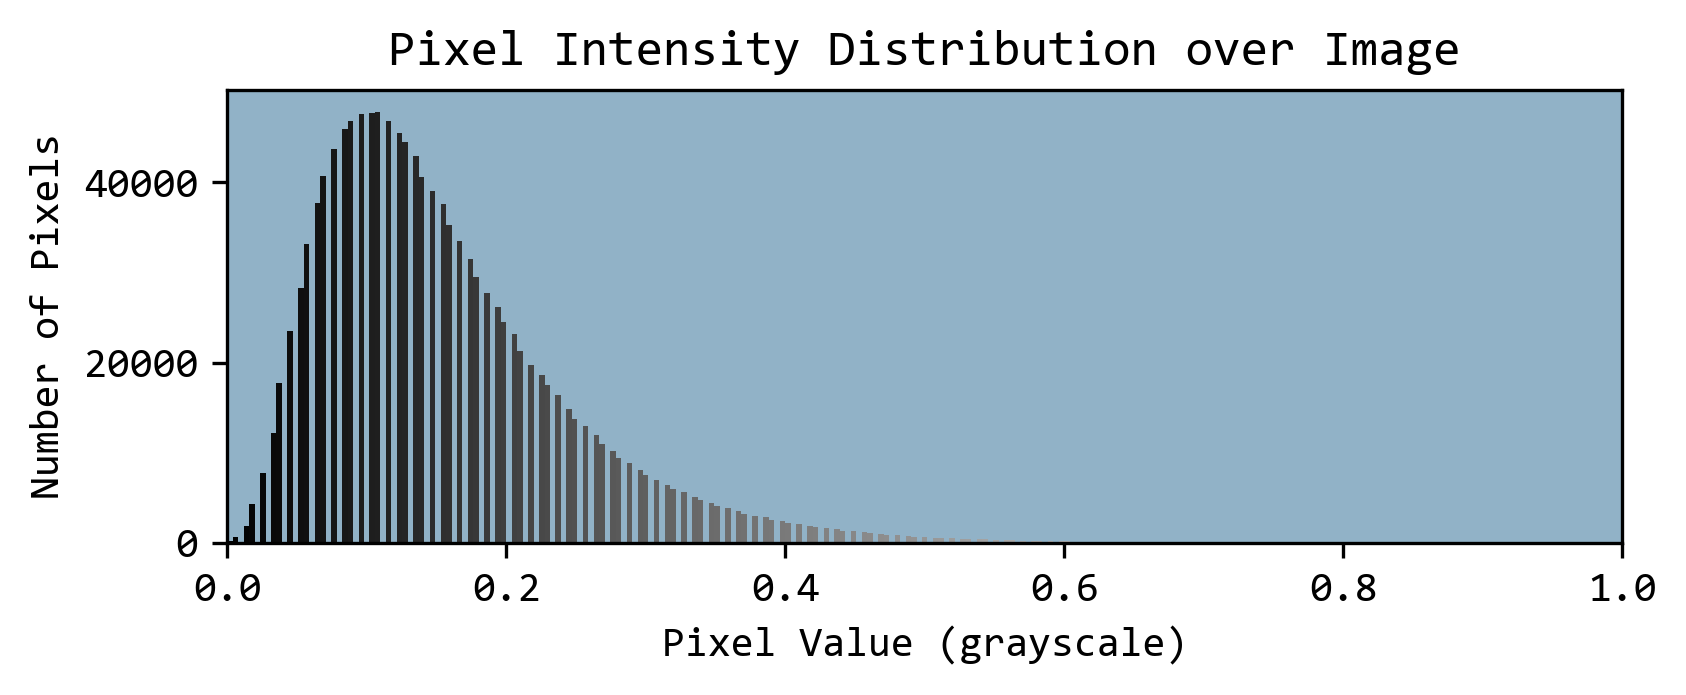

In [9]:
plotintensitydistribution(normalize(neighbor_difference_image))

##### Trying out some clipping:

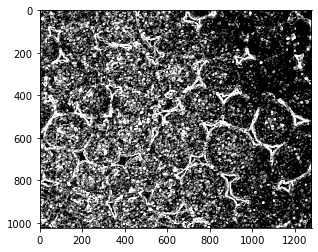

In [10]:
plt.imshow(neighbor_difference_image, cmap='Greys_r', clim=(0.1,0.3));

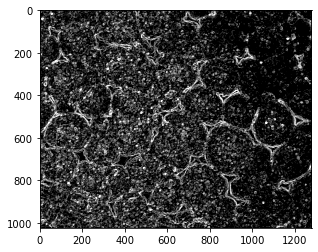

In [11]:
plt.imshow(neighbor_difference_image, cmap='Greys_r', clim=(0.1,0.5));

##### Next, I am going to try some filtering and convolution:

Sharpening w/ filter $\omega = \begin{bmatrix}0&-1&0\\-1&5&-1\\0&-1&0\end{bmatrix}$

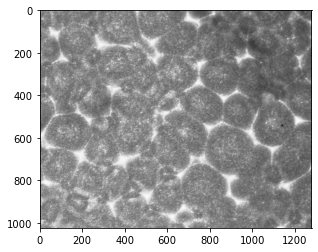

In [12]:
sharp_kernel = np.array(
    [[0, -1,  0],
    [-1,  5, -1], 
    [0, -1,  0]])
sharp_image = cv2.filter2D(src=image, ddepth=-1, kernel=sharp_kernel)
plt.imshow(sharp_image, cmap='Greys_r');

Ridge Detection w/ filters such as $\omega = \begin{bmatrix}-1&-1&-1\\-1&8&-1\\-1&-1&-1\end{bmatrix}$

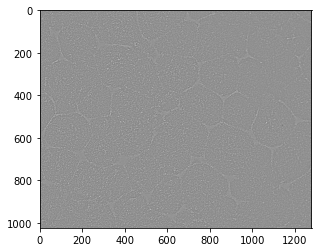

In [13]:
ridge_kernel_3 = np.array(
    [[-1, -1,  -1],
    [-1,  8, -1], 
    [-1, -1,  -1]])
ridge_image_3 = cv2.filter2D(src=image, ddepth=-1, kernel=ridge_kernel_3)
plt.imshow(ridge_image_3, cmap='Greys_r');

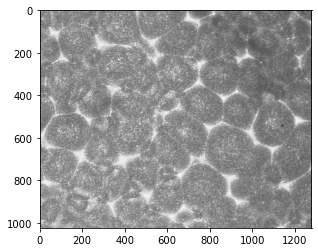

In [14]:
ridge_kernel_5 = np.array(
    [[-1, -1,  -1, -1, -1],
    [-1, 2, 2, 2, -1], 
    [-1, 2, 4, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1]])
ridge_image_5 = cv2.filter2D(src=image, ddepth=-1, kernel=ridge_kernel_5)
plt.imshow(ridge_image_5, cmap='Greys_r');

*What if we could somehow learn the optimal filter??*

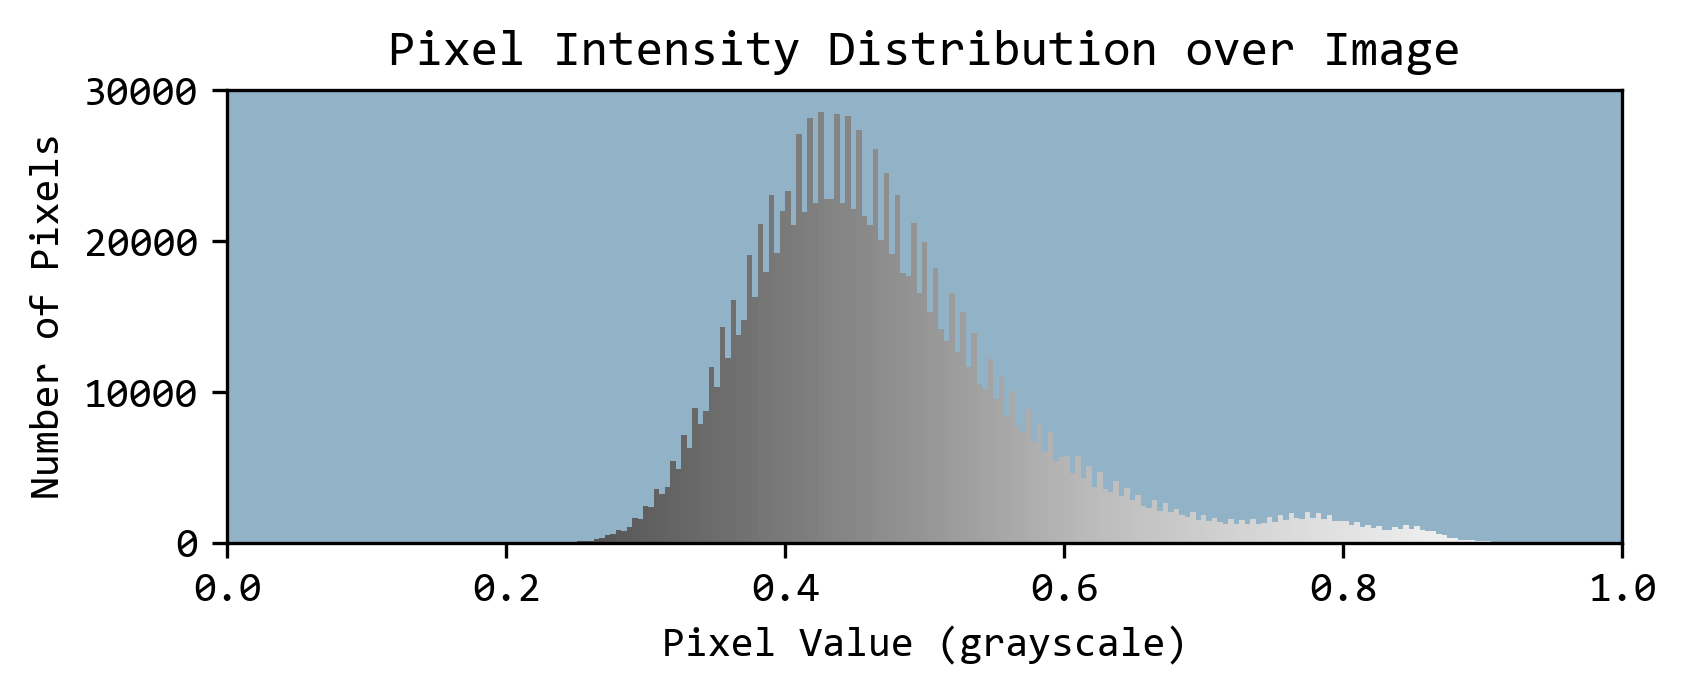

In [15]:
plotintensitydistribution(normalize(ridge_image_5))

**things to try**
 - dct
 - nearest neighbor measurements
 - sharpening
 - `cv2.filter2D`
 - filtering with range of circle/oval sizes after decreasing resolution
 - segmentation; review the literature
 - read RBC literature